In [22]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


**Import necessary library**

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

**Load data**

In [24]:
df=pd.read_csv("S:/Projects/Fraud_Detection/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Check shape**

In [25]:
df.shape

(284807, 31)

**Check null value**

In [26]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Check duplicate value**

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.shape

(283726, 31)

**Check column**

In [29]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Check unique value**

In [30]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

**Check fraud and valid case**

In [31]:
fraud = df [df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierfraction = len(fraud)/float(len(valid ))
print(outlierfraction)

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


**Check statical summary** 

In [32]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Class distribution**

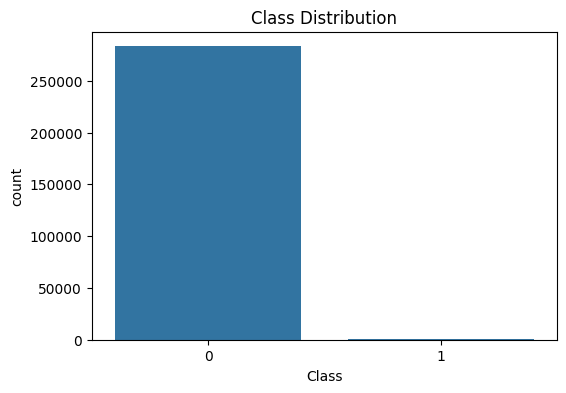

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

**Correlation analysis**

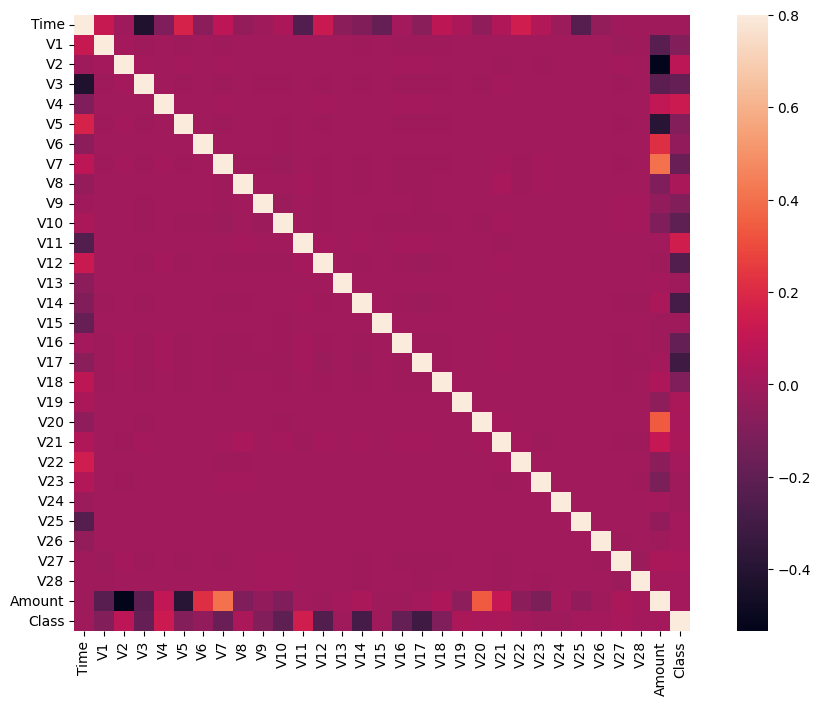

In [34]:
corr=df.corr()
fig=plt.figure(figsize=(12,8))
sns.heatmap(corr,vmax=.8,square=True)
plt.show()

**Separate x & y**

In [35]:
X = df.drop(columns=['Class'])
y = df['Class']

**Feature scaling**

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Feature selection**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
selector = RandomForestClassifier(n_estimators=100, random_state=42)
selector.fit(X_scaled, y)

# Use feature importance for feature selection
sfm = SelectFromModel(selector, threshold='median')
sfm.fit(X_scaled, y)
X_selected = sfm.transform(X_scaled)

# Get selected feature names
selected_features = X.columns[sfm.get_support()]

print(f'Original number of features: {X.shape[1]}')
print(f'Selected number of features: {X_selected.shape[1]}')
print('Selected features:', selected_features)


Original number of features: 30
Selected number of features: 15
Selected features: Index(['V1', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18', 'V20', 'V21', 'V26'],
      dtype='object')


**StratifiedKFold cross validation**

In [38]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

**RandomForest classifier model**

In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

for train_index, test_index in skf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)

In [40]:
y_pred = model.predict(X_test)

**Model Evaluation**

In [41]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))

The accuracy is 0.9994360736628778
The precision is 0.9846153846153847
The recall is 0.6736842105263158
The F1-Score is 0.8


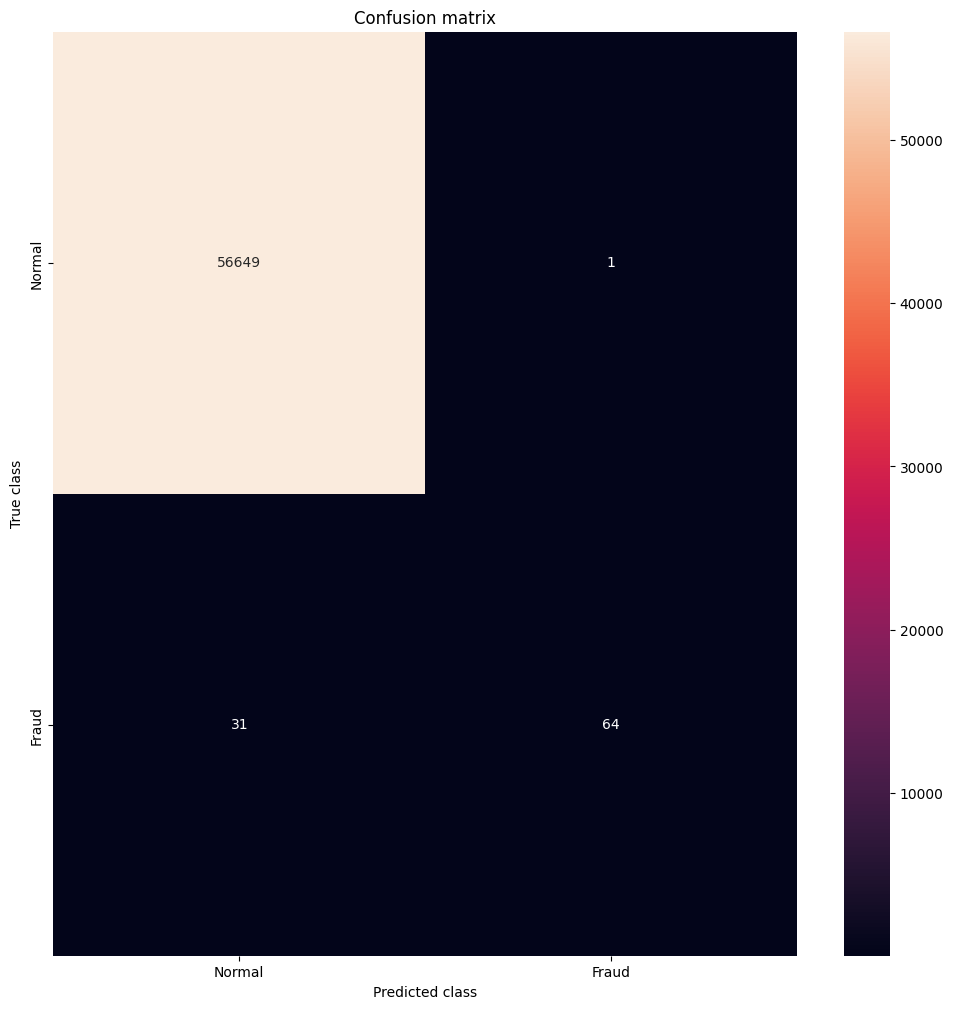

In [42]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred )
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()